## Viewing Spectral Profiler Data
This assumes you've already worked through the previous notebook for acessing and manipulating Kaguya data. So the first few steps shouldn't be new to you.

In [1]:
#The following two lines may be required
import sys
sys.path.append('[PATH TO PYHAT REPO]')
import libpyhat as phat
import plio.io.io_spectral_profiler as isp

In [2]:
profile = isp.Spectral_Profiler(phat.examples.get_path('SP_2C_02_02358_S138_E3586.spc'))
s       = profile.spectra

# Access the REF1 data
Here we're going to grab the REF1 data (Mare-correction) from the first observation (0) and slice off any wavelengths less than 700 and greater than 1600 - all at once!

In [3]:
subs = s[0]['REF1'][700:1600]

#This should show two columns, one with wavelength and the other with REF1 values
print(subs)

704.7     0.0809
710.8     0.0819
716.7     0.0830
722.7     0.0832
728.7     0.0844
           ...  
1563.7    0.1698
1571.7    0.1699
1579.6    0.1716
1587.7    0.1759
1595.7    0.1733
Name: REF1, Length: 122, dtype: float64


We can grab just the wavelength and just the data by doing the following:

In [4]:
#Spectral data
wv     = subs.index
#Wavelengths data
data   = subs.values
print('data',data)
print('wavelengths',wv)

data [0.0809 0.0819 0.083  0.0832 0.0844 0.0842 0.0861 0.0858 0.0864 0.0872
 0.0879 0.0883 0.0885 0.0893 0.0895 0.0909 0.0905 0.0912 0.091  0.0923
 0.0919 0.0924 0.0925 0.0932 0.0928 0.097  0.0922 0.0977 0.0934 0.0948
 0.0958 0.0956 0.096  0.0973 0.0977 0.0977 0.0992 0.0996 0.1011 0.1016
 0.1027 0.103  0.1053 0.106  0.1066 0.1074 0.1094 0.1086 0.1132 0.1137
 0.1138 0.1159 0.1163 0.1171 0.1186 0.1191 0.1202 0.1213 0.1234 0.1257
 0.1255 0.1271 0.1286 0.1276 0.1282 0.1286 0.1288 0.1308 0.1304 0.1324
 0.1345 0.135  0.1366 0.1371 0.1365 0.1381 0.1381 0.1396 0.1395 0.1412
 0.1422 0.141  0.1469 0.1453 0.1467 0.1467 0.1488 0.1482 0.1491 0.1519
 0.1533 0.154  0.1548 0.1555 0.1565 0.1574 0.1584 0.1586 0.1601 0.1588
 0.1614 0.1601 0.1623 0.1618 0.163  0.1659 0.1665 0.1645 0.164  0.164
 0.1679 0.1667 0.1673 0.1681 0.1697 0.1692 0.171  0.1698 0.1699 0.1716
 0.1759 0.1733]
wavelengths Float64Index([             704.7,  710.8000000000001,              716.7,
                           722.7,         

## Continuum Correct the Data
Now lets say you want to perform a 'continuum correction' to data within a certain range. We can use the continuum_correction function as part of PyHAT to do so.

In [ ]:
#The third argument contains the wavelength points between which 
#you want to apply the correction. The function call might produce
#a Python 'FutureWarning' error, but ignore.
x = phat.continuum.continuum_correction(data, wv, [704, 1596])

## Visualization: Plotting the Corrected Continuum
It's usually useful to visualize your data at some point, so let's use the spectra plotter in PyHAT to do so.

<AxesSubplot:title={'center':'Continuum correction'}>

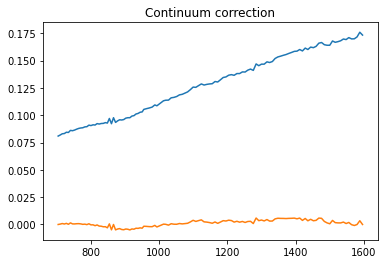

In [6]:
#Plot pre-correction data
subs.plot(title='Continuum correction')

#Perform correction by subtracting off the continuum contribution
subs.loc[700:1600] -= x[1]

#Plot post-correction data
subs.plot()


# Transformations: Methods to Alter the Spectrum
!!! The following needs to be updated. Work in progress. !!!

<AxesSubplot:>

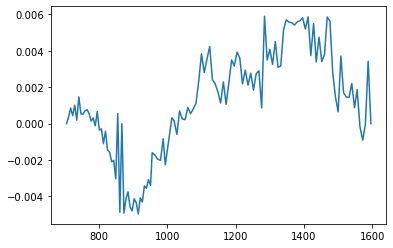

In [7]:
subs.plot()

704.7     0.000000
710.8     0.000367
716.7     0.000856
722.7     0.000433
728.7     0.001011
            ...   
1563.7   -0.000181
1571.7   -0.000911
1579.6   -0.000030
1587.7    0.003430
1595.7    0.000000
Name: REF1, Length: 122, dtype: float64
704.7     0.000122
710.8     0.000408
716.7     0.000552
722.7     0.000767
728.7     0.000544
            ...   
1563.7    0.000259
1571.7   -0.000374
1579.6    0.000829
1587.7    0.001133
1595.7    0.001143
Name: REF1, Length: 122, dtype: float64


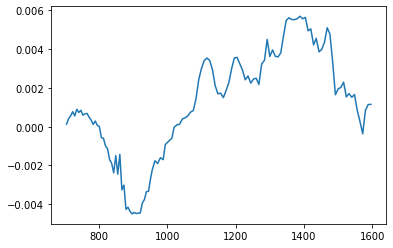

In [9]:
#Provide the boxcar function an array of the spectra values from the previous plot
b = phat.transform.smooth.boxcar(subs.values)
#Replace the data in the pyhat spectra object so that we can use the plotting function.
#Originally, the example chopped off the starting and end points of the 'b' array, perhaps to get rid of 
#artifacts from the boxcar operation (?), but then we'd have to reshape the subs object.
#This action will wipe out the previous spectral data in subs. If you don't want to do that
#then utilize subs.copy() to make a new spectra object
print(subs)
subs.iloc[:] = b
subs.plot()
print(subs)
#This could also be done using matplotlib. A minimal example:
#import matplotlib.pyplot as plt
#plt.plot(wv,b)
#plt.show()

## Horgan Analytics 
Here we demonstrate the application of some analysis methods published by Briony Horgan.

In [11]:
from libpyhat.analytics.analytics import band_area, band_asymmetry, band_center, band_minima

### Find the minimum in the spectra between two wavelength values

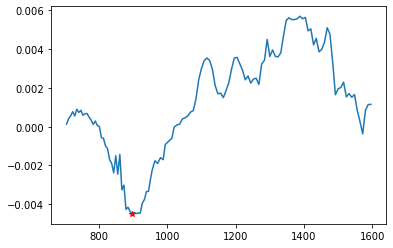

In [33]:
#The second and third arguments are the beginning and end of the minimum value search
minidx, minvalue = band_minima(subs, 800, 1000)
#Plot the spectra and the band minimum
import matplotlib.pyplot as plt
plt.plot(subs.index, subs.values)
plt.plot(subs[800:1000].index[minidx], minvalue, 'r*')
plt.show()

### Fit an nth degree polynomial to band center

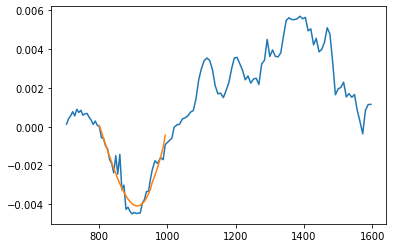

In [62]:
#This will fit a polynomial through a selected wavelength range.
#If you do not specify the 'degree' argument with an integer, it will pick degree 3 as the default.
#This could be dangerous, depending on the shape of the region, so do your own careful testing!
#The band_center function will also return 'center' of the fitted function.
center, fitted_spectra = band_center(subs, 800, 1000)
#Plot the original spectra with boxcar applied
plt.plot(subs.index, subs.values)
#Plot the fitted 
plt.plot(subs[800:1000].index, fitted_spectra)
plt.show()

### Determine the area under a region

In [63]:
#This utilizes the numpy trapz functionality. Please take a look there for how the area is computed.
band_area(subs, 750, 1000)

array([760.5])